In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('MRR raw.csv')

#rename the columns to make referencing easier
df=df.rename(columns={'Search Term (evar18)':'Search Term',
                   'Product Rank (evar12)':'Product Rank',
                   'Product Rank Instance (Instance of evar12)':'Occurences'})

#create a SOP column which product of the product rank for a search term and the number of times the product rank occured
df['SOP']=df['Product Rank']*df['Occurences']

#group the data set by search term so that we can find the average product rank of a search term
dfg=df.groupby('Search Term')

#Sum up all integer columns of the grouped dataset
dfgs=dfg.sum()

#create columns MR and MRR where
#MR= SOP/Sum of Occurences
dfgs['MR']=round(dfgs['SOP']/dfgs['Occurences'],2)
#MRR= Inv of MR
dfgs['MRR']=round((1/dfgs['MR']),2)
#avg= average MRR for a search term
avg=dfgs['MRR'].mean()
print('MRR for the week is :',avg)
dfgs.head
#export the dfgs dataset to a csv
dfgs.to_csv('mrr.csv')

### New approach

## Revised approach to MRR

### Search term wise MRR

In [1]:
#Read the file
df=pd.read_csv('MRR20220701-20230114.csv')
df.sample(5)

<IPython.core.display.Javascript object>

,Search Term (evar18),Product Rank (evar12),Mobile Device Type,Login Status (evar4),ECID (evar1),Visit Number,Time Stamp (prop3),Product Rank (event19)
9566806,ipad,4.0,Mobile Phone,guest user,58735333978004571112289380788719028313,2,2022-7-21 5:0:1,4.0
2160483,airpods,1.0,Mobile Phone,guest user,13215418631246369121580022467793754712,3,2022-11-8 22:40:37,1.0
20701426,samsung watch,19.0,Other,guest user,13312840627519557401292530640018966549,28,2022-10-14 15:42:54,19.0
22479865,usb cables & connectors,30.0,Mobile Phone,registered user,80921064786095698501115211175000190343,10,2022-11-26 10:50:57,30.0
13930663,marshall portable & bluetooth speakers,7.0,Mobile Phone,guest user,68818815033261496042666220107932588908,3,2022-8-14 16:16:46,7.0


<IPython.core.display.Javascript object>

(array([ 47563.,  92286.,  69161.,  71242.,  58945.,  29007.,  73698.,
         26383.,  27234., 101904.,  27207.,  26452.,  18479.,  22412.,
         31007.,   8860.,  11445.,   7351.,   5869., 270259.]),
 array([6.79809653e-04, 5.06458192e-02, 1.00611829e-01, 1.50577838e-01,
        2.00543848e-01, 2.50509857e-01, 3.00475867e-01, 3.50441876e-01,
        4.00407886e-01, 4.50373895e-01, 5.00339905e-01, 5.50305914e-01,
        6.00271924e-01, 6.50237933e-01, 7.00203943e-01, 7.50169952e-01,
        8.00135962e-01, 8.50101971e-01, 9.00067981e-01, 9.50033990e-01,
        1.00000000e+00]),
 <BarContainer object of 20 artists>)

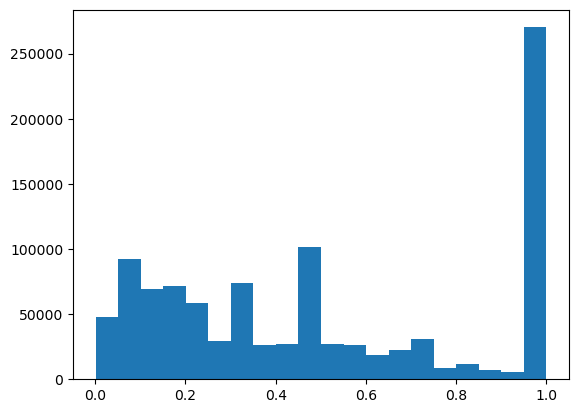

In [2]:
#create a Reciprocal rank column
df['Reciprocal']=1/df['Product Rank (evar12)']

#calculate search term wise MRR
df_search_term=df.groupby(by='Search Term (evar18)').mean().reset_index()
df_search_term=df_search_term[['Search Term (evar18)','Product Rank (evar12)','Reciprocal']]

#Adding a count column for further analysis
df_search_count=df.groupby(by='Search Term (evar18)').count().reset_index()
df_search_count=df_search_count[['Search Term (evar18)','Reciprocal']]
df_search_count.rename(columns={'Reciprocal':'Count'},inplace=True)
df_search_term=df_search_term.merge(df_search_count,on='Search Term (evar18)')
df_search_term.to_csv('MRR_searchterm.csv')
plt.hist(df_search_term['Reciprocal'],bins=20,label='Distribution of MRR')

<IPython.core.display.Javascript object>

(array([  2.,   9.,  48., 195., 426., 543., 468., 365., 307., 291., 264.,
        203., 176., 151., 106.,  73.,  46.,  41., 171., 252.]),
 array([0.08998293, 0.13548378, 0.18098463, 0.22648549, 0.27198634,
        0.31748719, 0.36298805, 0.4084889 , 0.45398976, 0.49949061,
        0.54499146, 0.59049232, 0.63599317, 0.68149402, 0.72699488,
        0.77249573, 0.81799659, 0.86349744, 0.90899829, 0.95449915,
        1.        ]),
 <BarContainer object of 20 artists>)

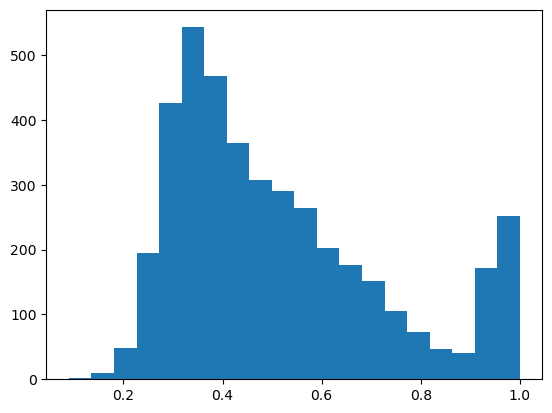

In [6]:
df_search_term=df_search_term[df_search_term['Count']>500]
plt.hist(df_search_term['Reciprocal'],bins=20,label='Distribution of MRR')

In [8]:
df_search_term.describe()

,Product Rank (evar12),Reciprocal,Count
count,4137.000000,4137.000000,4137.000000
mean,5.659194,0.512597,4334.705342
std,4.435372,0.211049,15030.250424
min,1.000000,0.089983,501.000000
25%,2.668770,0.347551,720.000000
50%,4.501134,0.455501,1240.000000
75%,7.624525,0.631267,3048.000000
max,104.720706,1.000000,603728.000000


In [12]:
df_top_1000=df_search_term.sort_values(by='Count',ascending=False)
df_top_1000=df_top_1000.iloc[0:1000]
df_top_1000=df_search_term.sort_values(by='Reciprocal',ascending=False)
df_top_1000.head(50)

,Search Term (evar18),Product Rank (evar12),Reciprocal,Count
857999,sandisk cruzer blade 32gb usb 2.0 flash drive ...,1.000000,1.000000,521
48886,251802,1.024724,0.993935,6714
48890,251804,1.044848,0.992983,6221
46020,248586,1.041192,0.992391,2719
52140,258999,1.057242,0.991841,1153
48888,251803,1.042754,0.991074,6245
49281,252418,1.093146,0.989963,569
46019,248585,1.069329,0.989505,2279
43709,244930,1.053191,0.988741,658
53835,261932,1.059524,0.987862,504


### Monthly MRR for top 1000 search terms(Jul-Jan)

In [11]:
#Monthly breakdown of top 1000 search terms
import warnings
warnings.filterwarnings("ignore")
#Read the file
df=pd.read_csv('MRR20220701-20230114.csv')

<IPython.core.display.Javascript object>

In [5]:
#create a Reciprocal rank column
df['Reciprocal']=1/df['Product Rank (evar12)']

#Add month column
df['Time Stamp (prop3)']=pd.to_datetime(df['Time Stamp (prop3)'])
df['Month']=df['Time Stamp (prop3)'].dt.month
df=df[df['Month']!=6]

#Group the df by Month+ST such that we get Mean of each search term for the month
df_month_mrr=df.groupby(by=['Month','Search Term (evar18)']).mean().reset_index()
df_month_mrr=df_month_mrr[['Month','Search Term (evar18)','Reciprocal']]

#Group the df by Month+ST such that we get count of each search term for the month
df_month_count=df.groupby(by=['Month','Search Term (evar18)']).count().reset_index()
df_month_count=df_month_count[['Search Term (evar18)','Reciprocal','Month']]
df_month_count.rename(columns={'Reciprocal':'Reciprocal Count'},inplace=True)

#Final dataframe
df_final=df_month_count.merge(df_month_mrr,on=['Month','Search Term (evar18)'])

#create df for each month, sort the df by the count of each sort term, get the first 1000 rows and find the mean of this df
df_Jul=df_final[df_final['Month']==7]
df_Jul=df_Jul.sort_values(by='Reciprocal Count',ascending=False)
df_Jul_1000=df_Jul.iloc[0:1000]
print('MRR for Jul is',df_Jul_1000['Reciprocal'].mean())

df_Aug=df_final[df_final['Month']==8]
df_Aug=df_Aug.sort_values(by='Reciprocal Count',ascending=False)
df_Aug_1000=df_Aug.iloc[0:1000]
print('MRR for Aug is',df_Aug_1000['Reciprocal'].mean())

df_Sep=df_final[df_final['Month']==9]
df_Sep=df_Sep.sort_values(by='Reciprocal Count',ascending=False)
df_Sep_1000=df_Sep.iloc[0:1000]
print('MRR for Sep is',df_Sep_1000['Reciprocal'].mean())


df_Oct=df_final[df_final['Month']==10]
df_Oct=df_Oct.sort_values(by='Reciprocal Count',ascending=False)
df_Oct_1000=df_Oct.iloc[0:1000]
print('MRR for Oct is',df_Oct_1000['Reciprocal'].mean())


df_Nov=df_final[df_final['Month']==11]
df_Nov=df_Nov.sort_values(by='Reciprocal Count',ascending=False)
df_Nov_1000=df_Nov.iloc[0:1000]
print('MRR for Nov is',df_Nov_1000['Reciprocal'].mean())


df_Dec=df_final[df_final['Month']==12]
df_Dec=df_Dec.sort_values(by='Reciprocal Count',ascending=False)
df_Dec_1000=df_Dec.iloc[0:1000]
print('MRR for Dec is',df_Dec_1000['Reciprocal'].mean())

df_Jan=df_final[df_final['Month']==1]
df_Jan=df_Jan.sort_values(by='Reciprocal Count',ascending=False)
df_Jan_1000=df_Jan.iloc[0:1000]
print('MRR for Jan is',df_Jan_1000['Reciprocal'].mean())

<IPython.core.display.Javascript object>

MRR for Jul is 0.4362767316663357
MRR for Aug is 0.4301811566536999
MRR for Sep is 0.4343753206702435
MRR for Oct is 0.4388925670155159
MRR for Nov is 0.4451269812908868
MRR for Dec is 0.4535657297504017
MRR for Jan is 0.45761584645075676


In [6]:
df_Jan_1000.sample(5)

,Search Term (evar18),Reciprocal Count,Month,Reciprocal
89197,oil filled radiator (ofr) room heater,2116,1,0.350237
43811,deep freezer refrigerators,252,1,0.716825
92621,oppo f21s pro 5g,772,1,0.694943
105247,s22,936,1,0.266447
104325,room heater,1661,1,0.316837


### Device wise split for MRR per month

In [18]:
df['Mobile Device Type'].value_counts()

Tablet    235519
Name: Mobile Device Type, dtype: int64

In [13]:
df_mobile=df[df['Mobile Device Type']=='Mobile Phone']
df_laptop=df[df['Mobile Device Type']=='Other']
df_tablet=df[df['Mobile Device Type']=='Tablet']

### Mobile

In [14]:
df=df_mobile
#create a Reciprocal rank column
df['Reciprocal']=1/df['Product Rank (evar12)']

#Add month column
df['Time Stamp (prop3)']=pd.to_datetime(df['Time Stamp (prop3)'])
df['Month']=df['Time Stamp (prop3)'].dt.month
df=df[df['Month']!=6]

#Group the df by Month+ST such that we get Mean of each search term for the month
df_month_mrr=df.groupby(by=['Month','Search Term (evar18)']).mean().reset_index()
df_month_mrr=df_month_mrr[['Month','Search Term (evar18)','Reciprocal']]

#Group the df by Month+ST such that we get count of each search term for the month
df_month_count=df.groupby(by=['Month','Search Term (evar18)']).count().reset_index()
df_month_count=df_month_count[['Search Term (evar18)','Reciprocal','Month']]
df_month_count.rename(columns={'Reciprocal':'Reciprocal Count'},inplace=True)

#Final dataframe
df_final=df_month_count.merge(df_month_mrr,on=['Month','Search Term (evar18)'])

#create df for each month, sort the df by the count of each sort term, get the first 1000 rows and find the mean of this df
df_Jul=df_final[df_final['Month']==7]
df_Jul=df_Jul.sort_values(by='Reciprocal Count',ascending=False)
df_Jul_1000=df_Jul.iloc[0:1000]
print('MRR for Jul is',df_Jul_1000['Reciprocal'].mean())

df_Aug=df_final[df_final['Month']==8]
df_Aug=df_Aug.sort_values(by='Reciprocal Count',ascending=False)
df_Aug_1000=df_Aug.iloc[0:1000]
print('MRR for Aug is',df_Aug_1000['Reciprocal'].mean())

df_Sep=df_final[df_final['Month']==9]
df_Sep=df_Sep.sort_values(by='Reciprocal Count',ascending=False)
df_Sep_1000=df_Sep.iloc[0:1000]
print('MRR for Sep is',df_Sep_1000['Reciprocal'].mean())


df_Oct=df_final[df_final['Month']==10]
df_Oct=df_Oct.sort_values(by='Reciprocal Count',ascending=False)
df_Oct_1000=df_Oct.iloc[0:1000]
print('MRR for Oct is',df_Oct_1000['Reciprocal'].mean())


df_Nov=df_final[df_final['Month']==11]
df_Nov=df_Nov.sort_values(by='Reciprocal Count',ascending=False)
df_Nov_1000=df_Nov.iloc[0:1000]
print('MRR for Nov is',df_Nov_1000['Reciprocal'].mean())


df_Dec=df_final[df_final['Month']==12]
df_Dec=df_Dec.sort_values(by='Reciprocal Count',ascending=False)
df_Dec_1000=df_Dec.iloc[0:1000]
print('MRR for Dec is',df_Dec_1000['Reciprocal'].mean())

df_Jan=df_final[df_final['Month']==1]
df_Jan=df_Jan.sort_values(by='Reciprocal Count',ascending=False)
df_Jan_1000=df_Jan.iloc[0:1000]
print('MRR for Jan is',df_Jan_1000['Reciprocal'].mean())

<IPython.core.display.Javascript object>

MRR for Jul is 0.42356440950050994
MRR for Aug is 0.40781343443529616
MRR for Sep is 0.4144239010713629
MRR for Oct is 0.4218797863590386
MRR for Nov is 0.42832414052092127
MRR for Dec is 0.44023121652046554
MRR for Jan is 0.4370814457072615


### Laptop

In [15]:
df=df_laptop
#create a Reciprocal rank column
df['Reciprocal']=1/df['Product Rank (evar12)']

#Add month column
df['Time Stamp (prop3)']=pd.to_datetime(df['Time Stamp (prop3)'])
df['Month']=df['Time Stamp (prop3)'].dt.month
df=df[df['Month']!=6]

#Group the df by Month+ST such that we get Mean of each search term for the month
df_month_mrr=df.groupby(by=['Month','Search Term (evar18)']).mean().reset_index()
df_month_mrr=df_month_mrr[['Month','Search Term (evar18)','Reciprocal']]

#Group the df by Month+ST such that we get count of each search term for the month
df_month_count=df.groupby(by=['Month','Search Term (evar18)']).count().reset_index()
df_month_count=df_month_count[['Search Term (evar18)','Reciprocal','Month']]
df_month_count.rename(columns={'Reciprocal':'Reciprocal Count'},inplace=True)

#Final dataframe
df_final=df_month_count.merge(df_month_mrr,on=['Month','Search Term (evar18)'])

#create df for each month, sort the df by the count of each sort term, get the first 1000 rows and find the mean of this df
df_Jul=df_final[df_final['Month']==7]
df_Jul=df_Jul.sort_values(by='Reciprocal Count',ascending=False)
df_Jul_1000=df_Jul.iloc[0:1000]
print('MRR for Jul is',df_Jul_1000['Reciprocal'].mean())

df_Aug=df_final[df_final['Month']==8]
df_Aug=df_Aug.sort_values(by='Reciprocal Count',ascending=False)
df_Aug_1000=df_Aug.iloc[0:1000]
print('MRR for Aug is',df_Aug_1000['Reciprocal'].mean())

df_Sep=df_final[df_final['Month']==9]
df_Sep=df_Sep.sort_values(by='Reciprocal Count',ascending=False)
df_Sep_1000=df_Sep.iloc[0:1000]
print('MRR for Sep is',df_Sep_1000['Reciprocal'].mean())


df_Oct=df_final[df_final['Month']==10]
df_Oct=df_Oct.sort_values(by='Reciprocal Count',ascending=False)
df_Oct_1000=df_Oct.iloc[0:1000]
print('MRR for Oct is',df_Oct_1000['Reciprocal'].mean())


df_Nov=df_final[df_final['Month']==11]
df_Nov=df_Nov.sort_values(by='Reciprocal Count',ascending=False)
df_Nov_1000=df_Nov.iloc[0:1000]
print('MRR for Nov is',df_Nov_1000['Reciprocal'].mean())


df_Dec=df_final[df_final['Month']==12]
df_Dec=df_Dec.sort_values(by='Reciprocal Count',ascending=False)
df_Dec_1000=df_Dec.iloc[0:1000]
print('MRR for Dec is',df_Dec_1000['Reciprocal'].mean())

df_Jan=df_final[df_final['Month']==1]
df_Jan=df_Jan.sort_values(by='Reciprocal Count',ascending=False)
df_Jan_1000=df_Jan.iloc[0:1000]
print('MRR for Jan is',df_Jan_1000['Reciprocal'].mean())

<IPython.core.display.Javascript object>

MRR for Jul is 0.5286486994477229
MRR for Aug is 0.5112609868564236
MRR for Sep is 0.4933361678929206
MRR for Oct is 0.4996884688833364
MRR for Nov is 0.4998889278247953
MRR for Dec is 0.48913196971582756
MRR for Jan is 0.49464521691799573


### Tablet

In [16]:
df=df_tablet
#create a Reciprocal rank column
df['Reciprocal']=1/df['Product Rank (evar12)']

#Add month column
df['Time Stamp (prop3)']=pd.to_datetime(df['Time Stamp (prop3)'])
df['Month']=df['Time Stamp (prop3)'].dt.month
df=df[df['Month']!=6]

#Group the df by Month+ST such that we get Mean of each search term for the month
df_month_mrr=df.groupby(by=['Month','Search Term (evar18)']).mean().reset_index()
df_month_mrr=df_month_mrr[['Month','Search Term (evar18)','Reciprocal']]

#Group the df by Month+ST such that we get count of each search term for the month
df_month_count=df.groupby(by=['Month','Search Term (evar18)']).count().reset_index()
df_month_count=df_month_count[['Search Term (evar18)','Reciprocal','Month']]
df_month_count.rename(columns={'Reciprocal':'Reciprocal Count'},inplace=True)

#Final dataframe
df_final=df_month_count.merge(df_month_mrr,on=['Month','Search Term (evar18)'])

#create df for each month, sort the df by the count of each sort term, get the first 1000 rows and find the mean of this df
df_Jul=df_final[df_final['Month']==7]
df_Jul=df_Jul.sort_values(by='Reciprocal Count',ascending=False)
df_Jul_1000=df_Jul.iloc[0:1000]
print('MRR for Jul is',df_Jul_1000['Reciprocal'].mean())

df_Aug=df_final[df_final['Month']==8]
df_Aug=df_Aug.sort_values(by='Reciprocal Count',ascending=False)
df_Aug_1000=df_Aug.iloc[0:1000]
print('MRR for Aug is',df_Aug_1000['Reciprocal'].mean())

df_Sep=df_final[df_final['Month']==9]
df_Sep=df_Sep.sort_values(by='Reciprocal Count',ascending=False)
df_Sep_1000=df_Sep.iloc[0:1000]
print('MRR for Sep is',df_Sep_1000['Reciprocal'].mean())


df_Oct=df_final[df_final['Month']==10]
df_Oct=df_Oct.sort_values(by='Reciprocal Count',ascending=False)
df_Oct_1000=df_Oct.iloc[0:1000]
print('MRR for Oct is',df_Oct_1000['Reciprocal'].mean())


df_Nov=df_final[df_final['Month']==11]
df_Nov=df_Nov.sort_values(by='Reciprocal Count',ascending=False)
df_Nov_1000=df_Nov.iloc[0:1000]
print('MRR for Nov is',df_Nov_1000['Reciprocal'].mean())


df_Dec=df_final[df_final['Month']==12]
df_Dec=df_Dec.sort_values(by='Reciprocal Count',ascending=False)
df_Dec_1000=df_Dec.iloc[0:1000]
print('MRR for Dec is',df_Dec_1000['Reciprocal'].mean())

df_Jan=df_final[df_final['Month']==1]
df_Jan=df_Jan.sort_values(by='Reciprocal Count',ascending=False)
df_Jan_1000=df_Jan.iloc[0:1000]
print('MRR for Jan is',df_Jan_1000['Reciprocal'].mean())

<IPython.core.display.Javascript object>

MRR for Jul is 0.4442694643825688
MRR for Aug is 0.4330416010118502
MRR for Sep is 0.44049533200347174
MRR for Oct is 0.4353896450284436
MRR for Nov is 0.443884416330743
MRR for Dec is 0.4623048098794948
MRR for Jan is 0.47485197048814853
